In [27]:
import numpy as np
import prtools as pr 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from jupyterthemes import jtplot
jtplot.style(theme="grade3")

# Exercise 6.1

$C_{100}^5=75,287,520$

In [2]:
from scipy.special import comb
print(comb(100,5))

75287520.0


# Exercise 6.2

$XX^T = C$, $X$ is central mean

$AX(AX)^T = AXX^TA^T = ACA^T$

Hints: $(AB)^T = B^TA^T$

# Exercise 6.3~6.6

you should know that $S_m = S_w + S_B$ for a fact

$m,\Sigma$: mean and covariance of all samples

$m_i,\Sigma_i$: mean and covariance of class i

Within-scatter: $S_w = \sum_{i=1}^C \frac{n_i}{n} \Sigma_i$

Between-scatter: $S_B = \sum_{i=1}^C \frac{n_i}{n}(m_i-m)(m_i-m)^T$

# Exercise 6.7

(a) 

The orthogonal line of the line across the points belonging to the same class.

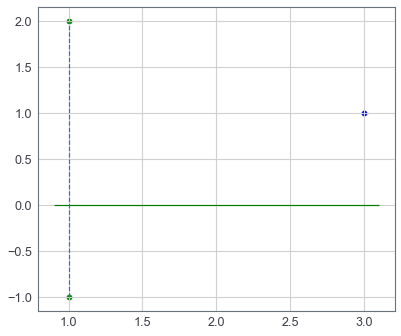

In [58]:
a = np.array([[1,-1], [1,2]])
b = np.array([3,1])
plt.scatter(a[:,0], a[:,1], c="green")
plt.scatter(b[0], b[1], c="blue")
plt.plot(a[:,0], a[:,1], linestyle="dashed")
plt.hlines(0, 0.9, 3.1,colors="green")
plt.show()

(b)

The orthogonal line of the plane constituted by the three points belonging to the same class. 

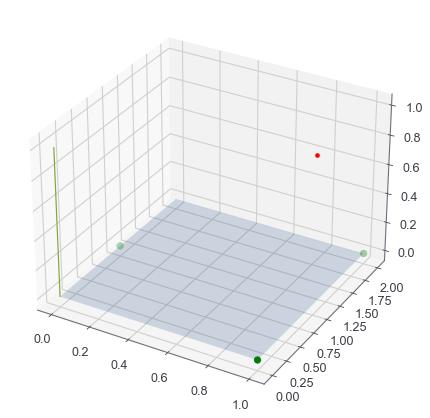

In [90]:
a = np.array([[1,0,0], [0,1,0], [1,2,0]])
b = np.array([1,1,1])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(a[:,0], a[:,1], a[:,2], c="green", s=50)
ax.scatter(b[0], b[1], b[2], c="red")
X, Y = np.meshgrid(a[:,0], a[:,1])
Z = np.array([a[:,2]])
ax.plot_surface(X, Y, Z, alpha=0.1)
ax.plot(np.array([0,0]),np.array([0,0]),np.array([0,1]))
plt.show()

(c)

It cannot always find Fisher 1D subspace, as it requires $S_W \to 0$ (all the points from the same class can project to a single point), which means that $J(a)=S_W^{-1}S_B$ tends to infinite.

(d)

The answer cannot be defined which can be zero or go to infinite.

# Exercise 6.8

## PCA Procedure:
1. Centralize the sample (very important)
$$x_i=x_i-\frac{1}{n} \sum_{j=1}^n x_j$$
2. Calculate the covariance matrix
$$C=\frac{1}{n}XX^T$$
3. Calculate the eigenvector and eigenvalue
4. Choose the frist several eigenvectors according to the ranking of eigenvalues (from large to small)
5. Constitute the eigenvectors as row to be a new matrix P
6. Lower dimensional $X_{new} = PX$ 

## PCA Example:
The example is from the trial exam:

In [67]:
C = np.array([[1,0,0], [0,2,0], [0,0,4]])

In [68]:
# Calculate the eigenvector and eigenvalue

value, vector = np.linalg.eig(C)

print("eigenValue: ", value)
print("eigenVector: \n", vector)

eigenValue:  [1. 2. 4.]
eigenVector: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Therefore, The first princeple component is [0,0,1]. The direction is the thrid dimension

In [72]:
T = np.array([[1,0,0], [0,0.5,-np.sqrt(3)/2], [0,np.sqrt(3)/2,0.5]])
C_trans = T.dot(C).dot(T.T) # see exercise 6.2
print(C_trans)

[[ 1.         0.         0.       ]
 [ 0.         3.5       -0.8660254]
 [ 0.        -0.8660254  2.5      ]]


In [74]:
# Calculate the eigenvector and eigenvalue, again

value_trans, vector_trans = np.linalg.eig(C_trans)

print("New eigenValue: ", value_trans)
print("New eigenVector: \n", vector_trans)

New eigenValue:  [2. 4. 1.]
New eigenVector: 
 [[ 0.         0.         1.       ]
 [-0.5       -0.8660254  0.       ]
 [-0.8660254  0.5        0.       ]]


The give answer is [0, 0.8660254, -0.5]. This is the same as [0, -0.8660254, 0.5]. We don't care about the direction. 

(a)

see exercise 6.2 (This only holds for zero-mean samples)

(b)

<img src="./week6_figure/PCA.PNG" width="75%">

# Exercise 6.9~6.12

# Exercise 6.13

(a)

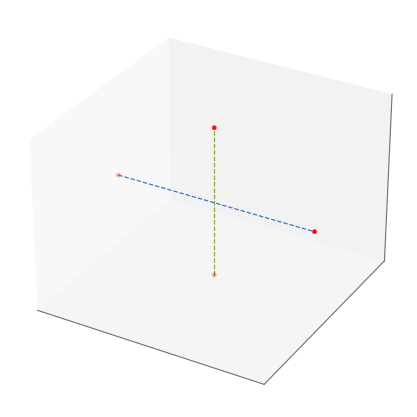

In [102]:
mean = np.array([[-5,0,0], [5,0,0], [0,0,3], [0,0,-3]])
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zticks([-6,6])
ax.set_xticks([-6,6])
ax.set_yticks([-6,6])
ax.scatter(mean[:,0], mean[:,1], mean[:,2], s=20, c="red")
plt.plot([-5,5], [0,0] ,[0,0], linestyle="dashed")
plt.plot([0,0], [0,0] ,[-3,3], linestyle="dashed")
plt.show()

PCA direction: (1,0,0)

(b)

(1,0,0)

(c)

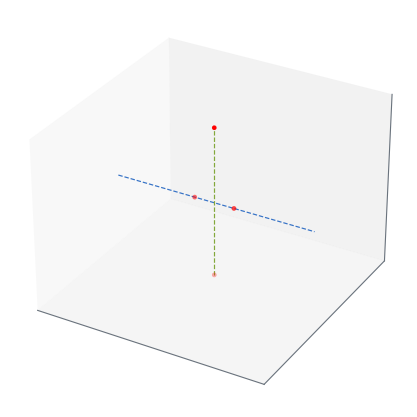

In [103]:
mean = np.array([[-5,0,0], [5,0,0], [0,0,3], [0,0,-3]])
mean[:,0] = mean[:,0]/4
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zticks([-6,6])
ax.set_xticks([-6,6])
ax.set_yticks([-6,6])
ax.scatter(mean[:,0], mean[:,1], mean[:,2], s=20, c="red")
plt.plot([-5,5], [0,0] ,[0,0], linestyle="dashed")
plt.plot([0,0], [0,0] ,[-3,3], linestyle="dashed")
plt.show()

<b>2D PCA</b> will no change, it will still be xz plane.

(d)

- PCA: Perform dimensionality reduction while preserving as much of the variance in the high dimensional space as possible.
- LDA: Perform dimensionality reduction while preserving as much of the class discriminatory information as possible.

The within scatter will be rather unstable & the second dimension does not contain any discriminatory information $\to$ Fisher LDA will not be the best.

Therefore, PCA will therefore be better in general.

Conclusion: PCA can work for both small and large dataset, while LDA is limited for the small dataset.